In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [2]:
df=pd.read_csv("Outpatient Imaging Efficiency_Hospital.csv",encoding='latin1')

In [3]:
df.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number Measure ID  \
0  DOTHAN    AL     36301     HOUSTON    3347938701      OP_10   
1  DOTHAN    AL     36301     HOUSTON    3347938701      OP_11   
2  DOTHAN    AL     36301     HOUSTON    3347938701      OP_13   
3  DOTHAN    AL     36301     HOUSTON    3347938701      OP_14   
4  DOTHAN    AL     36301     HOUSTON    3347938701       OP_8   

                                        Measure Name Score Footnote  \
0                Abdomen CT Use of Contrast Material   6.4      NaN   
1                 Thorax CT Use of Contrast Material   0.9      NaN   
2  Outpatients who got cardiac imaging stress tes...   7.1      NaN   
3  Outpatients with brain CT scans who got a sinu...   2.4      NaN   
4                 MRI Lumbar Spine for Low Back Pain  38.1      NaN   

  Measure Start Date Measure End Date  
0         07/01/2014       06/30/2015  
1         07/01/2014       06/30/2015  
2         07/01/2014       06/30/2015  
3         07/01/2014       06/30/2015  
4         07/01/2014       06/30/2015

In [4]:
df.shape

(28908, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
Provider ID           28908 non-null int64
Hospital Name         28908 non-null object
Address               28908 non-null object
City                  28908 non-null object
State                 28908 non-null object
ZIP Code              28908 non-null int64
County Name           28818 non-null object
Phone Number          28908 non-null int64
Measure ID            28908 non-null object
Measure Name          28908 non-null object
Score                 28908 non-null object
Footnote              12595 non-null object
Measure Start Date    28908 non-null object
Measure End Date      28908 non-null object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


In [6]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID            0.00
Hospital Name          0.00
Address                0.00
City                   0.00
State                  0.00
ZIP Code               0.00
County Name            0.31
Phone Number           0.00
Measure ID             0.00
Measure Name           0.00
Score                  0.00
Footnote              56.43
Measure Start Date     0.00
Measure End Date       0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [7]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(28908, 13)

In [8]:
df=df.dropna(axis=0, how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28907
Data columns (total 13 columns):
Provider ID           28818 non-null int64
Hospital Name         28818 non-null object
Address               28818 non-null object
City                  28818 non-null object
State                 28818 non-null object
ZIP Code              28818 non-null int64
County Name           28818 non-null object
Phone Number          28818 non-null int64
Measure ID            28818 non-null object
Measure Name          28818 non-null object
Score                 28818 non-null object
Measure Start Date    28818 non-null object
Measure End Date      28818 non-null object
dtypes: int64(3), object(10)
memory usage: 3.1+ MB


In [10]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28907
Data columns (total 13 columns):
Provider ID           28818 non-null int64
Hospital Name         28818 non-null object
Address               28818 non-null object
City                  28818 non-null object
State                 28818 non-null object
ZIP Code              28818 non-null int64
County Name           28818 non-null object
Phone Number          28818 non-null int64
Measure ID            28818 non-null object
Measure Name          28818 non-null object
Score                 28818 non-null object
Measure Start Date    28818 non-null object
Measure End Date      28818 non-null object
dtypes: int64(3), object(10)
memory usage: 3.1+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [11]:
df=df[~(df["Score"].isin(['Not Applicable','Not Available']))]# & (df["Score"].isin(['Not Applicable','Not Available'])) & (df["Lower Estimate"].isin(['Not Applicable','Not Available'])) & (df["Higher Estimate"].isin(['Not Applicable','Not Available']))]

In [12]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 0 to 28849
Data columns (total 9 columns):
Provider ID           16300 non-null int64
Hospital Name         16300 non-null object
ZIP Code              16300 non-null int64
County Name           16300 non-null object
Measure ID            16300 non-null object
Measure Name          16300 non-null object
Score                 16300 non-null object
Measure Start Date    16300 non-null object
Measure End Date      16300 non-null object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


### Converting some categorical variables to numeric

In [14]:
df["Score"] = df["Score"].apply(pd.to_numeric,errors='coerce')


In [15]:
df=df.fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 0 to 28849
Data columns (total 9 columns):
Provider ID           16300 non-null int64
Hospital Name         16300 non-null object
ZIP Code              16300 non-null int64
County Name           16300 non-null object
Measure ID            16300 non-null object
Measure Name          16300 non-null object
Score                 16300 non-null float64
Measure Start Date    16300 non-null object
Measure End Date      16300 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


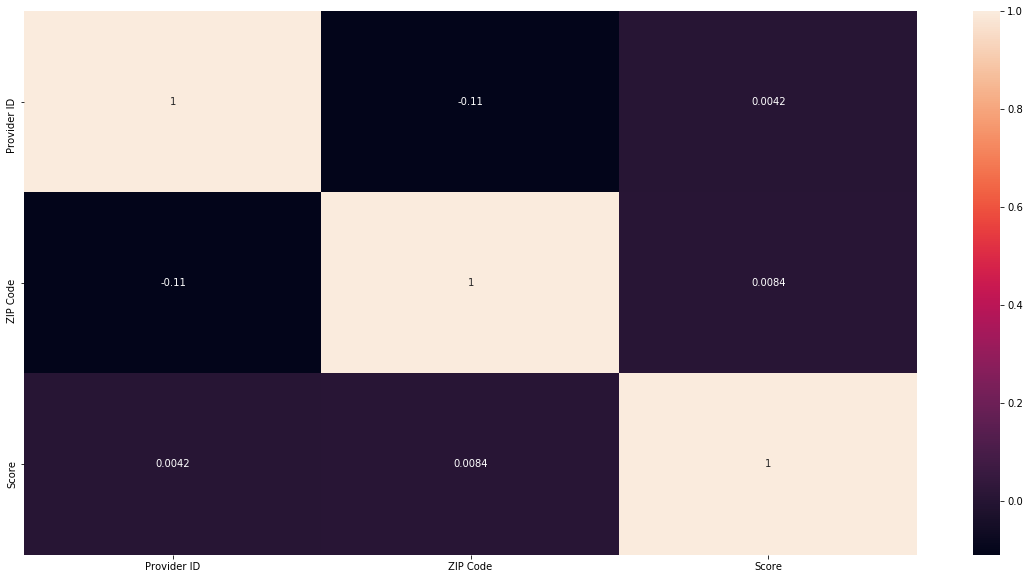

In [17]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [18]:
df.to_csv('Outpatient Imaging Efficiency.csv')

In [19]:
OPImgEff = df[:]
OPImgEff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 0 to 28849
Data columns (total 9 columns):
Provider ID           16300 non-null int64
Hospital Name         16300 non-null object
ZIP Code              16300 non-null int64
County Name           16300 non-null object
Measure ID            16300 non-null object
Measure Name          16300 non-null object
Score                 16300 non-null float64
Measure Start Date    16300 non-null object
Measure End Date      16300 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB
